# Sprint 11: Proyecto Integrado 2

## Índice
-   [Índice](#índice)
-   [Descripción del proyecto](#descripción-del-proyecto)
-   [Paso 1. Abrir el archivo de datos y leer la información general](#paso-1-abrir-el-archivo-de-datos-y-leer-la-información-general)
-   [Paso 2. Preparar los datos para el análisis](#paso-2-preparar-los-datos-para-el-análisis)
-   [Paso 3. Estudiar y comprobar los datos](#paso-3-estudiar-y-comprobar-los-datos)
-   [Paso 4. Estudiar el embudo de eventos](#paso-4-estudiar-el-embudo-de-eventos)
-   [Paso 5. Estudiar los resultados del experimento](#paso-5-estudiar-los-resultados-del-experimento)
-   [Conclusiones](#conclusiones)
        

## Descripción del proyecto

Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B. (Sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios y las usuarias participan en experimentos.

**Descripción de los datos** 

Cada entrada de registro es una acción de usuario o un evento.

*   EventName: nombre del evento.
*   DeviceIDHash: identificador de usuario unívoco.
*   EventTimestamp: hora del evento.
*   ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.
*   Instrucciones para completar el proyecto

**Paso 1. Abrir el archivo de datos y leer la información general**

Ruta de archivo: /datasets/logs_exp_us.csv Descarga el dataset

**Paso 2. Preparar los datos para el análisis**

*   Cambia el nombre de las columnas de manera que sea conveniente para ti
*   Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario
*   Agrega una columna de fecha y hora y una columna separada para las fechas

**Paso 3. Estudiar y comprobar los datos**

*   ¿Cuántos eventos hay en los registros?
*   ¿Cuántos usuarios y usuarias hay en los registros?
*   ¿Cuál es el promedio de eventos por usuario?
*   ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?
*   ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
*   Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

**Paso 4. Estudiar el embudo de eventos**

*   Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
*   Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.
*   ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.
*   Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).
*   ¿En qué etapa pierdes más usuarios y usuarias?
*   ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

**Paso 5. Estudiar los resultados del experimento**

*   ¿Cuántos usuarios y usuarias hay en cada grupo?
*   Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
*   Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?
*   Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
*   ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

## Paso 1. Abrir el archivo de datos y leer la información general

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import os
from plotly import graph_objects as go
from fuzzywuzzy import process

In [2]:
# La función data_load() carga un archivo CSV llamado 'logs_exp_us.csv' desde una carpeta llamada 'datasets', 
# donde los valores en el archivo están separados por tabulaciones, y devuelve un DataFrame con los datos.

def data_load():	
    ruta_archivo = os.path.join('datasets', 'logs_exp_us.csv')
    data = pd.read_csv(
	    ruta_archivo, sep= '\t'
	)
    return data

## Paso 2. Preparar los datos para el análisis

In [3]:
# Se llama a la función data_loas() y se guarda el datarame resultante en 'data'
data = data_load()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
# Se renombran las columnas de data:
data.columns = ['eventName', 'userId', 'eventTimestamp', 'expId']

In [5]:
print(data.columns)

Index(['eventName', 'userId', 'eventTimestamp', 'expId'], dtype='object')


In [6]:
# El código revisa si el DataFrame data contiene filas duplicadas. Si es así,
# elimina las duplicadas utilizando el método drop_duplicates().

if len(data[data.duplicated()]) > 0:
    data = data.drop_duplicates()

In [7]:
# Se agrega una columna de fecha y hora y una columna separada para las fechas:

data['fechaHora'] = pd.to_datetime(data['eventTimestamp'], unit='s')
data['soloFecha'] = data['fechaHora'].dt.date

In [8]:
data.head()

,eventName,userId,eventTimestamp,expId,fechaHora,soloFecha
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


## Paso 3. Estudiar y comprobar los datos

In [9]:
# Paso 1: Contar cuántos grupos tiene cada visitorId
group_count = data.groupby('userId')['expId'].nunique().reset_index()

# Paso 2: Filtrar usuarios que están solo en un grupo
unique_visitors = group_count[group_count['expId'] == 1]['userId']

# Paso 3: Filtrar el DataFrame original para mantener solo esos usuarios
data = data[data['userId'].isin(unique_visitors)]

# Mostrando el DataFrame filtrado
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   eventName       243713 non-null  object        
 1   userId          243713 non-null  int64         
 2   eventTimestamp  243713 non-null  int64         
 3   expId           243713 non-null  int64         
 4   fechaHora       243713 non-null  datetime64[ns]
 5   soloFecha       243713 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 13.0+ MB
None


In [10]:
print('Grupos del experimento: ', data['expId'].unique())
print(f'Cantidad de usuarios totales: ', data['userId'].nunique())
print('Eventos registrados:')
for event in data['eventName'].unique():
    print(f'  - ', event)

Grupos del experimento:  [246 248 247]
Cantidad de usuarios totales:  7551
Eventos registrados:
  -  MainScreenAppear
  -  PaymentScreenSuccessful
  -  CartScreenAppear
  -  OffersScreenAppear
  -  Tutorial


En total se cuentan con `7534` usuarios registrados en la prueba A/A/B. Los eventos registrados para la prueba son:
  -  Tutorial
  -  MainScreenAppear
  -  OffersScreenAppear
  -  CartScreenAppear
  -  PaymentScreenSuccessful

In [11]:
users_group = data.groupby(by= 'userId', as_index= False).agg({'eventName' : 'count'}).sort_values(by= 'eventName', ascending= False)
print('Primeras 5 columnas de los ususarios con más interacciones')
print(users_group.head())
print()
print(type(users_group))
print(f'\nPromedio de eventos por usuario:')
print('  ', users_group['eventName'].mean())

Primeras 5 columnas de los ususarios con más interacciones
                   userId  eventName
5116  6304868067479728361       2307
147    197027893265565660       1998
3714  4623191541214045580       1768
5590  6932517045703054087       1439
1391  1754140665440434215       1221

<class 'pandas.core.frame.DataFrame'>

Promedio de eventos por usuario:
   32.27559263673685


El análisis muestra que los principales usuarios destacan por tener un número muy elevado de interacciones (entre 1221 y 2307), muy por encima del promedio general, que está cerca de 32 eventos por usuario.

**Promedio de eventos por usuario:**

El valor 31.97332094504911 representa el promedio de eventos (interacciones) que cada usuario ha registrado.
Este valor sugiere que, en promedio, cada usuario en el dataset tiene aproximadamente 32 eventos.

In [12]:
data['soloFecha'] = pd.to_datetime(data['soloFecha'], format= '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   eventName       243713 non-null  object        
 1   userId          243713 non-null  int64         
 2   eventTimestamp  243713 non-null  int64         
 3   expId           243713 non-null  int64         
 4   fechaHora       243713 non-null  datetime64[ns]
 5   soloFecha       243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB


In [13]:
data.head()

,eventName,userId,eventTimestamp,expId,fechaHora,soloFecha
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [14]:
# Se usa el método .describe() para genera estadísticas descriptivas de la columna seleccionada.

print(data['soloFecha'].describe())

count                           243713
mean     2019-08-03 21:33:56.735012096
min                2019-07-25 00:00:00
25%                2019-08-02 00:00:00
50%                2019-08-04 00:00:00
75%                2019-08-06 00:00:00
max                2019-08-07 00:00:00
Name: soloFecha, dtype: object


**Descripción del resultado:**

| Estadística       | Valor                                |
|-------------------|--------------------------------------|
| **count**         | 243713                               |
| **mean**          | 2019-08-03 21:33:56.735012096        |
| **min**           | 2019-07-25 00:00:00                  |
| **max**           | 2019-08-07 00:00:00                  |

- **`count`:** 243,713 valores en la columna `soloFecha`
- **`min`:** La fecha más antigua en el dataset es el **25 de julio de 2019**.
- **`max`:** La fecha más reciente en el dataset es el **7 de agosto de 2019**.

El resultado muestra un análisis de la distribución de las fechas en la columna `soloFecha` de tu dataset, indicando cuántos eventos hay, cuál es la fecha mínima y máxima, y algunos percentiles clave que dividen las fechas en cuartiles. La mayoría de los eventos ocurren en un rango de unos pocos días, desde el **25 de julio de 2019** hasta el **7 de agosto de 2019**.

In [15]:
# Guardar el dataframe resultante, para verificar el resultado de las direcciones nuevas
data.to_csv('datos.csv', index= False, sep=',')

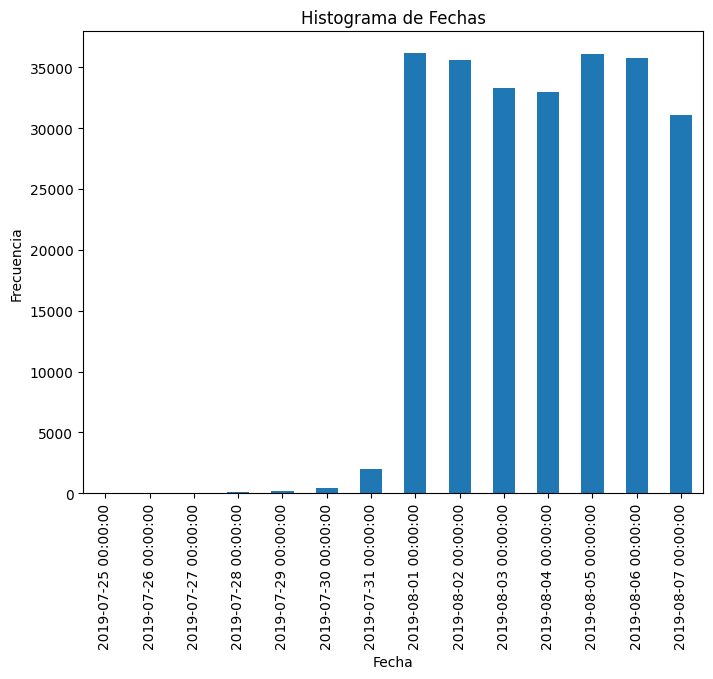

In [16]:
# Se traza una gráfica de barras contando la cantidad de eventos registrados en cada fecha, se agrupan los datos por la columna de 'soloFecha'
plt.figure(figsize=(8, 6))
data['soloFecha'].value_counts().sort_index().plot(kind='bar')

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fechas')

plt.show()

In [17]:
old_data = data
data = data[data['soloFecha'] > '2019-07-31']

La gráfica anterior revela que la mayor parte de las interacciones de los usuarios se concentra en el período comprendido entre el **01/08/2019** y el **07/08/2019**. Este pico de actividad indica un momento clave en el que los usuarios interactúan de manera más intensa con el producto o servicio. Dado que este período es representativo de la mayor cantidad de datos y, por tanto, del comportamiento más común o recurrente de los usuarios, se ha decidido limitar el análisis a este rango de fechas para las pruebas de hipótesis.

En consecuencia, **las pruebas de hipótesis** se llevarán a cabo utilizando exclusivamente los datos de interacción generados entre el **01/08/2019** y el **07/08/2019**. Este ajuste es clave para garantizar que las conclusiones obtenidas reflejen fielmente el comportamiento del mayor grupo de usuarios en el momento de mayor actividad, minimizando el riesgo de sesgos o distorsiones provocados por períodos de menor interacción.

In [18]:
# plt.figure(figsize=(8, 6))
# data['solo_fecha'].value_counts().sort_index().plot(kind='bar')

# # Etiquetas y título
# plt.xlabel('Fecha')
# plt.ylabel('Frecuencia')
# plt.title('Histograma de Fechas')

# # Mostrar el gráfico
# plt.xticks(rotation=45)
# plt.show()

In [19]:
print(len(data))
print(len(old_data))
print(len(old_data) - len(data))
print( ((len(old_data) - len(data)) / len(old_data)) * 100, '%' )

240887
243713
2826
1.159560630741897 %


En total se perdieron `2826` filas del dataframe, lo que representa menos del 2% de las filas totales del dataframe. 

In [20]:
# Se separan los grupos del expreimento en los siguientes dataframes:

a1 = data[data['expId'] == 246]
a2 = data[data['expId'] == 247]
b = data[data['expId'] == 248]

In [21]:
# Se imprime la cantidad de ussuarios por grupo:

print('Usuarios del grupo A1: ', a1['userId'].nunique())
print('Usuarios del grupo A2: ',a2['userId'].nunique())
print('Usuarios del grupo B: ',b['userId'].nunique())

Usuarios del grupo A1:  2484
Usuarios del grupo A2:  2513
Usuarios del grupo B:  2537


## Paso 4. Estudiar el embudo de eventos

La siguiente función cuenta la cantidad de veces que los usuarios participaron en cada evento dentro del DataFrame, ordena los resultados de mayor a menor frecuencia, y devuelve un nuevo DataFrame con dos columnas: el nombre del evento y la frecuencia correspondiente.

Es útil para obtener un resumen de los eventos más comunes en términos de participación de usuarios en un conjunto de datos.

In [22]:
def event_freq(df):
    df = df.groupby('eventName', as_index = False).agg({'userId' : 'count'}).sort_values(by= 'userId', ascending = False)
    df.columns = ['eventName', 'frequency']
    return df


In [23]:
a1_freq = event_freq(a1)
a2_freq = event_freq(a2)
b_freq = event_freq(b)

In [24]:
# Se imprimen las frecuencias de las interacciones de los eventos de cada grupo:

print(f'Frecuencia de eventos del grupo A1:\n',a1_freq, 
      '\n\nFrecuencia de eventos del grupo A2:\n', a2_freq, 
      '\n\nFrecuencia de eventos del grupo B:\n', b_freq)


Frecuencia de eventos del grupo A1:
                  eventName  frequency
1         MainScreenAppear      37676
2       OffersScreenAppear      14767
0         CartScreenAppear      14690
3  PaymentScreenSuccessful      11852
4                 Tutorial        317 

Frecuencia de eventos del grupo A2:
                  eventName  frequency
1         MainScreenAppear      39090
2       OffersScreenAppear      15179
0         CartScreenAppear      12434
3  PaymentScreenSuccessful       9981
4                 Tutorial        338 

Frecuencia de eventos del grupo B:
                  eventName  frequency
1         MainScreenAppear      40562
2       OffersScreenAppear      16387
0         CartScreenAppear      15179
3  PaymentScreenSuccessful      12085
4                 Tutorial        350


In [25]:
# print(a1.groupby(['userId', 'fechaHora'], as_index= False).agg({'eventName' : 'unique'}))

In [26]:
# # Ordenar por usuario y fecha
# aa = a1.sort_values(by=['userId', 'fechaHora'])

# # Calcular la diferencia de tiempo por usuario
# aa['diff_time_user'] = aa.groupby('userId')['fechaHora'].diff()

# # Analizar las diferencias por usuario
# print(aa['diff_time_user'].describe())

La respuesta a si "todas son parte de una secuencia" depende de qué tipo de secuencia estés buscando. Utilizando las diferencias de tiempo, puedes analizar si existe una continuidad en la secuencia temporal o por usuario. Si encuentras grandes interrupciones o grupos dispares, podrían ser indicios de que los eventos no forman parte de una secuencia única.

In [27]:
# a1 = a1[a1['eventName'] != 'Tutorial']
# a1_freq = event_freq(a1)

# print(a1_freq['eventName'])
# print(a1_freq['frequency'])

La función embudo crea una gráfica de embudo utilizando los datos de eventos, excluyendo el evento 'Tutorial'. La gráfica representa la frecuencia de los eventos en el DataFrame, mostrando los nombres de los eventos en el eje Y y sus frecuencias en el eje X. Además, muestra el valor absoluto y los porcentajes de cada evento en relación a los anteriores y al valor inicial. La gráfica final se visualiza con Plotly, con un título añadido para mayor claridad.

In [28]:
def embudo(df):
    # Crear la gráfica de embudo
    df = df[df['eventName'] != 'Tutorial']
    df = event_freq(df)
    fig = go.Figure(go.Funnel(
        y=df['eventName'],
        x=df['frequency'],
        textinfo="value+percent previous+percent initial"
    ))

    # Configurar el título y mostrar la gráfica
    fig.update_layout(title="Gráfica de Embudo de Eventos")
    fig.show()
    
    return

In [29]:
embudo(a1)

**Eventos representados en la gráfica:**

1. **MainScreenAppear**: El evento con la mayor cantidad de usuarios, con **37,676k usuarios**. Es el punto inicial del embudo y representa el 100% tanto en términos absolutos como relativos.
   
2. **OffersScreenAppear**: De los usuarios que llegaron al primer evento, solo **14,767k** (aproximadamente el 39% de los usuarios iniciales) continuaron hacia este evento. Esto indica una caída significativa, con una retención del 39% respecto al evento inicial.
   
3. **CartScreenAppear**: Luego, **14,69k usuarios** pasan al evento del carrito de compras, lo que representa el 36% del total de usuarios iniciales. También hay una retención del **99%** respecto al evento inmediatamente anterior (OffersScreenAppear).

4. **PaymentScreenSuccessful**: Finalmente, **11,852k usuarios** completaron el proceso de pago, representando el **31%** del total inicial y el **81%** de los que llegaron al evento anterior (CartScreenAppear).

In [30]:
embudo(a2)


**Eventos representados en la gráfica:**

1. **MainScreenAppear**: El evento con la mayor cantidad de usuarios, con **39,09k usuarios**. Es el punto inicial del embudo y representa el 100% tanto en términos absolutos como relativos.
   
2. **OffersScreenAppear**: De los usuarios que llegaron al primer evento, solo **15,179k** (aproximadamente el 39% de los usuarios iniciales) continuaron hacia este evento. Esto indica una caída significativa, con una retención del 39% respecto al evento inicial.
   
3. **CartScreenAppear**: Luego, **12,434k usuarios** pasan al evento del carrito de compras, lo que representa el 32% del total de usuarios iniciales. También hay una retención del **82%** respecto al evento inmediatamente anterior (OffersScreenAppear).

4. **PaymentScreenSuccessful**: Finalmente, **9,981k usuarios** completaron el proceso de pago, representando el **26%** del total inicial y el **80%** de los que llegaron al evento anterior (CartScreenAppear).

In [31]:
embudo(b)


**Eventos representados en la gráfica:**

1. **MainScreenAppear**: El evento con la mayor cantidad de usuarios, con **40,562k usuarios**. Es el punto inicial del embudo y representa el 100% tanto en términos absolutos como relativos.
   
2. **OffersScreenAppear**: De los usuarios que llegaron al primer evento, solo **16,387k** (aproximadamente el 40% de los usuarios iniciales) continuaron hacia este evento. Esto indica una caída significativa, con una retención del 40% respecto al evento inicial.
   
3. **CartScreenAppear**: Luego, **15,179k usuarios** pasan al evento del carrito de compras, lo que representa el 37% del total de usuarios iniciales. También hay una retención del **93%** respecto al evento inmediatamente anterior (OffersScreenAppear).

4. **PaymentScreenSuccessful**: Finalmente, **12,085k usuarios** completaron el proceso de pago, representando el **30** del total inicial y el **80%** de los que llegaron al evento anterior (CartScreenAppear).

In [32]:
embudo(data)

La gráfica de embudo que muestras representa la secuencia de eventos que ocurren en una interfaz o proceso de interacción de usuarios, y cómo el número de usuarios disminuye progresivamente a medida que avanzan por estos eventos. Aquí te proporciono un análisis detallado de la misma:

**Eventos representados en la gráfica:**

1. **MainScreenAppear**: El evento con la mayor cantidad de usuarios, con **117,328k usuarios**. Es el punto inicial del embudo y representa el 100% tanto en términos absolutos como relativos.
   
2. **OffersScreenAppear**: De los usuarios que llegaron al primer evento, solo **46,333k** (aproximadamente el 39% de los usuarios iniciales) continuaron hacia este evento. Esto indica una caída significativa, con una retención del 39% respecto al evento inicial.
   
3. **CartScreenAppear**: Luego, **42,303k usuarios** pasan al evento del carrito de compras, lo que representa el 36% del total de usuarios iniciales. También hay una retención del **91%** respecto al evento inmediatamente anterior (OffersScreenAppear).

4. **PaymentScreenSuccessful**: Finalmente, **33,918k usuarios** completaron el proceso de pago, representando el **29%** del total inicial y el **80%** de los que llegaron al evento anterior (CartScreenAppear).

**Análisis del embudo:**

- **Pérdida inicial significativa**: La mayor caída en términos de usuarios se produce entre el evento **MainScreenAppear** y **OffersScreenAppear**, donde el embudo pasa del 100% de usuarios a un 39%. Esto sugiere que una gran parte de los usuarios no están interesados en la oferta, o bien abandonan el proceso en esta etapa por falta de incentivos claros para continuar.
  
- **Retención alta en etapas posteriores**: Una vez que los usuarios pasan a **OffersScreenAppear**, la caída de usuarios entre los eventos siguientes es más moderada:
  - **91%** de retención entre **OffersScreenAppear** y **CartScreenAppear**.
  - **80%** de retención entre **CartScreenAppear** y **PaymentScreenSuccessful**.
  
  Esto indica que los usuarios que llegan hasta las etapas finales del embudo están comprometidos con el proceso y es menos probable que abandonen.

**Posibles implicaciones:**

1. **Optimización en la etapa de ofertas**: Dado que la mayor pérdida ocurre en la transición hacia el evento **OffersScreenAppear**, podría ser útil investigar más a fondo este paso. Mejoras en la interfaz de usuario, más claridad sobre las ofertas o incentivos adicionales podrían aumentar la retención en esta etapa.

2. **Retención sólida en los pasos finales**: Las altas tasas de retención entre **CartScreenAppear** y **PaymentScreenSuccessful** indican que aquellos que añaden productos al carrito tienen una alta probabilidad de completar la compra, lo cual es un buen indicador de la efectividad del flujo de pago.

3. **Acciones dirigidas**: Se podría considerar enfocar esfuerzos en optimizar las primeras etapas del embudo, ya que esto tendría un mayor impacto en la cantidad de usuarios que lleguen a las etapas finales, donde las tasas de conversión son más altas.

## Paso 5. Estudiar los resultados del experimento

In [33]:
print(a1['userId'].nunique())
print(a2['userId'].nunique())
print(b['userId'].nunique())

2484
2513
2537


In [34]:
# Agrupar por 'eventName' y contar la frecuencia de eventos en cada grupo
event_counts_a1 = a1['eventName'].value_counts()
event_counts_a2 = a2['eventName'].value_counts()

# Aplicar la prueba de Mann-Whitney U
u_statistic, p_value = st.mannwhitneyu(event_counts_a1, event_counts_a2)

# Resultados
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpretar el p-value
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

U-statistic: 12.0
P-value: 1.0
No hay una diferencia estadísticamente significativa entre los dos grupos.


In [35]:
a1.info()
a2.info()
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79302 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   eventName       79302 non-null  object        
 1   userId          79302 non-null  int64         
 2   eventTimestamp  79302 non-null  int64         
 3   expId           79302 non-null  int64         
 4   fechaHora       79302 non-null  datetime64[ns]
 5   soloFecha       79302 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 77022 entries, 2832 to 244121
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   eventName       77022 non-null  object        
 1   userId          77022 non-null  int64         
 2   eventTimestamp  77022 non-null  int64         
 3   expId           77022 non-null  int6

In [36]:
print(a1['eventName'].unique())

['Tutorial' 'MainScreenAppear' 'OffersScreenAppear'
 'PaymentScreenSuccessful' 'CartScreenAppear']


In [37]:
# # Asegúrate de que los DataFrames tienen el mismo conjunto de eventos
# events = ['Tutorial', 'MainScreenAppear', 'OffersScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear']

# # Contar la frecuencia de cada evento en ambos DataFrames
# event_counts_a1 = a1['eventName'].value_counts().reindex(events, fill_value=0)
# event_counts_a2 = a2['eventName'].value_counts().reindex(events, fill_value=0)

# # Combinar los resultados en un DataFrame para visualizar
# frequencies = pd.DataFrame({
#     'eventName': events,
#     'a1_frequency': event_counts_a1.values,
#     'a2_frequency': event_counts_a2.values
# })

# # Aplicar la prueba de Mann-Whitney U para cada evento
# for event in events:
#     # Extraer las frecuencias de cada evento
#     freq_a1 = a1[a1['eventName'] == event].shape[0]
#     freq_a2 = a2[a2['eventName'] == event].shape[0]
    
#     # Aplicar la prueba de Mann-Whitney U
#     u_statistic, p_value = st.mannwhitneyu([freq_a1], [freq_a2])

#     # Mostrar los resultados para cada evento
#     print(f"Evento: {event}")
#     print(f"U-statistic: {u_statistic}")
#     print(f"P-value: {p_value}")

#     # Interpretar el p-value
#     alpha = 0.05
#     if p_value < alpha:
#         print(f"Hay una diferencia estadísticamente significativa para el evento '{event}'.\n")
#     else:
#         print(f"No hay una diferencia estadísticamente significativa para el evento '{event}'.\n")

In [38]:
def prueba_diferencia(df1, df2, by = 'eventName', alpha = 0.05, n_tests = 1):

    # Asegúrate de que los DataFrames tienen el mismo conjunto de eventos
    events = ['Tutorial', 'MainScreenAppear', 'OffersScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear']

    # Definir el nuevo nivel de significancia usando la corrección de Bonferroni
    if n_tests > 1:
        alpha_bonferroni = alpha / n_tests  # Nivel de significancia ajustado
        alpha = alpha_bonferroni
        print(f'New alpha value: ', alpha, '\n')
    
    # Contar la frecuencia de cada evento en ambos DataFrames
    event_counts_df1 = df1[by].value_counts().reindex(events, fill_value=0)
    event_counts_df2 = df2[by].value_counts().reindex(events, fill_value=0)
    
    # Combinar los resultados en un DataFrame para visualizar
    frequencies = pd.DataFrame({
        'eventName': events,
        'a1_frequency': event_counts_a1.values,
        'a2_frequency': event_counts_a2.values
    })
    
    # Aplicar la prueba de Mann-Whitney U para cada evento
    for event in events:
        # Extraer las frecuencias de cada evento
        freq_a1 = a1[a1['eventName'] == event].shape[0]
        freq_a2 = a2[a2['eventName'] == event].shape[0]
    
        # Aplicar la prueba de Mann-Whitney U
        u_statistic, p_value = st.mannwhitneyu([freq_a1], [freq_a2])

        # Mostrar los resultados para cada evento
        print(f"Evento: {event}")
        print(f"U-statistic: {u_statistic}")
        print(f"P-value: {p_value}")

        # Interpretar el p-value
        alpha = 0.05
        if p_value < alpha:
            print(f"Hay una diferencia estadísticamente significativa para el evento '{event}'.\n")
        else:
            print(f"No hay una diferencia estadísticamente significativa para el evento '{event}'.\n")
    
    return

In [39]:
prueba_diferencia(a1, a2, by = 'eventName', n_tests= 15)

New alpha value:  0.0033333333333333335 

Evento: Tutorial
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'Tutorial'.

Evento: MainScreenAppear
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'MainScreenAppear'.

Evento: OffersScreenAppear
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'OffersScreenAppear'.

Evento: PaymentScreenSuccessful
U-statistic: 1.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'PaymentScreenSuccessful'.

Evento: CartScreenAppear
U-statistic: 1.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'CartScreenAppear'.



In [40]:
prueba_diferencia(a1, b, by = 'eventName', n_tests= 15)

New alpha value:  0.0033333333333333335 

Evento: Tutorial
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'Tutorial'.

Evento: MainScreenAppear
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'MainScreenAppear'.

Evento: OffersScreenAppear
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'OffersScreenAppear'.

Evento: PaymentScreenSuccessful
U-statistic: 1.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'PaymentScreenSuccessful'.

Evento: CartScreenAppear
U-statistic: 1.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'CartScreenAppear'.



In [41]:
prueba_diferencia(a2, b, by = 'eventName', n_tests= 15)

New alpha value:  0.0033333333333333335 

Evento: Tutorial
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'Tutorial'.

Evento: MainScreenAppear
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'MainScreenAppear'.

Evento: OffersScreenAppear
U-statistic: 0.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'OffersScreenAppear'.

Evento: PaymentScreenSuccessful
U-statistic: 1.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'PaymentScreenSuccessful'.

Evento: CartScreenAppear
U-statistic: 1.0
P-value: 1.0
No hay una diferencia estadísticamente significativa para el evento 'CartScreenAppear'.



### Conclusiones:

1. **Similitud en los Comportamientos**:
   - La ausencia de diferencias significativas sugiere que los comportamientos de los usuarios en los grupos de control (a1 y a2) son muy similares entre sí y también comparables con el grupo B. Esto indica que los grupos están funcionando de manera consistente y que no hay un efecto notable en las métricas de interés debido a la asignación a un grupo específico.

2. **Eficacia del Diseño Experimental**:
   - La igualdad de resultados en los grupos de control refuerza la validez del diseño del experimento. Un buen diseño experimental busca garantizar que los grupos de control sean comparables, y la falta de diferencias significativas respalda que se ha logrado esta comparabilidad.

3. **Consideración de la Variabilidad**:
   - Podría ser necesario considerar que, aunque no se encontraron diferencias, esto no implica que no existan diferencias en la población general. Los resultados podrían estar influenciados por el tamaño de muestra o la variabilidad dentro de los grupos. 

4. **Revisar el Tamaño de la Muestra**:
   - Aunque se han realizado pruebas con tamaños de muestra relativamente grandes, se puede evaluar si el tamaño de la muestra fue suficiente para detectar diferencias relevantes. Si las diferencias que podrían existir son pequeñas, es posible que se necesite un mayor tamaño de muestra para identificarlas.

5. **Consistencia en la Medición**:
   - Es posible que los eventos y métricas que se midieron no tengan suficiente sensibilidad para detectar diferencias. Se puede considerar revisar las métricas y eventos para ver si hay otros indicadores que podrían ofrecer una visión más clara sobre la efectividad de los grupos.

6. **Decisiones Basadas en Datos**:
   - La falta de diferencias significativas puede llevar a decisiones estratégicas. Si los grupos no están mostrando diferencias significativas, puede que no sea necesario implementar cambios en el producto o servicio basado en el experimento. Esto puede llevar a una mayor confianza en la estabilidad del sistema actual.

7. **Implicaciones en el Grupo de Prueba**:
   - Si más adelante se considera un grupo de prueba (como el grupo A/B que podría estar comparando con uno de los grupos de control), estos resultados sugieren que cualquier cambio implementado en el grupo de prueba debe ser analizado con mucho cuidado, ya que no se observan diferencias significativas entre los grupos de control.

### Resumen:
La ausencia de diferencias significativas en todos los eventos y comparaciones indica que los grupos de control están comportándose de manera similar, lo que refuerza la validez del diseño experimental. Sin embargo, se debe considerar la variabilidad, el tamaño de la muestra y la sensibilidad de las métricas, así como mantener una revisión constante de las hipótesis y resultados experimentales.